In [6]:
import numpy as np
from scipy import stats

In [7]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


По данным опроса, 75% работников ресторанов утверждают, что испытывают на работе существенный стресс, оказывающий негативное влияние на их личную жизнь. Крупная ресторанная сеть опрашивает 100 своих работников, чтобы выяснить, отличается ли уровень стресса работников в их ресторанах от среднего. 67 из 100 работников отметили высокий уровень стресса. :

    выборка - бинарный вектор длины n, где 1 - уровень стреса высокий, 0 - низкий
    гипотеза H0 - работа в ресторане не влияет на уровень стресса
    статистика t - количество единиц в выборке.



In [12]:
n = 100
n_samples = 1000
samples = np.random.randint(2, size = (n_samples, n))

In [13]:
t_stat = map(sum, samples)

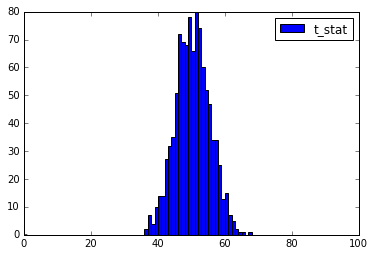

In [14]:
pylab.hist(t_stat, bins = 100, color = 'b', range = (0, 100), label = 't_stat')
pylab.legend()

H1 - работа в ресторане влияет на уровень стресса

In [20]:
print stats.binom_test(67, 100, 0.75, alternative = 'greater')
print stats.binom_test(22, 50, 0.75, alternative = 'greater')

0.97240543587
0.999999280201


In [22]:
print stats.binom_test(67, 100, 0.75)
print stats.binom_test(22, 50, 0.75)

0.0822225889139
3.48314789783e-06


The Wage Tract — заповедник в округе Тома, Джорджия, США, деревья в котором не затронуты деятельностью человека со времён первых поселенцев. Для участка заповедника размером 200х200 м имеется информация о координатах сосен (sn — координата в направлении север-юг, we — в направлении запад-восток, обе от 0 до 200).

Проверим, можно ли пространственное распределение сосен считать равномерным, или они растут кластерами.

Загрузите данные, поделите участок на 5х5 одинаковых квадратов размера 40x40 м, посчитайте количество сосен в каждом квадрате (чтобы получить такой же результат, как у нас, используйте функцию scipy.stats.binned_statistic_2d).

Если сосны действительно растут равномерно, какое среднее ожидаемое количество сосен в каждом квадрате? В правильном ответе два знака после десятичной точки.

In [23]:
import pandas as pd

In [29]:
data = pd.read_csv("pines.txt",delimiter='\t')

In [33]:
print data.head()
print data.shape

      sn    we
0  200.0   8.8
1  199.3  10.0
2  193.6  22.4
3  167.7  35.6
4  183.9  45.4
(584, 2)


In [55]:
square = stats.binned_statistic_2d(data.we,
                                   data.sn,
                                   np.ones((data.shape[0])),
                                   statistic='count',
                                   bins=(5,5))

In [66]:
print square.statistic
print square.statistic.mean()

[[ 18.  14.  12.   8.   7.]
 [ 26.  12.  24.  19.   8.]
 [ 29.  22.  15.  31.  37.]
 [ 25.  34.  50.  50.  27.]
 [ 20.  25.  37.   7.  27.]]
23.36


Чтобы сравнить распределение сосен с равномерным, посчитайте значение статистики хи-квадрат для полученных 5х5 квадратов. Округлите ответ до двух знаков после десятичной точки.

In [69]:
stats.chisquare(square.statistic, square.statistic.mean(), ddof = 1)

Power_divergenceResult(statistic=array([  3.48835616,  14.31541096,  46.87876712,  55.25034247,  30.65616438]), pvalue=array([  3.22275430e-01,   2.50579627e-03,   3.68822737e-10,
         6.07163327e-12,   1.00421834e-06]))

In [84]:
a = np.full([25],square.statistic.mean())

In [86]:
print a

[ 23.36  23.36  23.36  23.36  23.36  23.36  23.36  23.36  23.36  23.36
  23.36  23.36  23.36  23.36  23.36  23.36  23.36  23.36  23.36  23.36
  23.36  23.36  23.36  23.36  23.36]


In [98]:
aa = np.squeeze(np.asarray(square.statistic))

In [99]:
print aa

[[ 18.  14.  12.   8.   7.]
 [ 26.  12.  24.  19.   8.]
 [ 29.  22.  15.  31.  37.]
 [ 25.  34.  50.  50.  27.]
 [ 20.  25.  37.   7.  27.]]


In [100]:
A = np.asarray(square.statistic).reshape(-1)
print A

[ 18.  14.  12.   8.   7.  26.  12.  24.  19.   8.  29.  22.  15.  31.  37.
  25.  34.  50.  50.  27.  20.  25.  37.   7.  27.]


In [106]:
stats.chisquare(A, a, ddof = 0)

Power_divergenceResult(statistic=150.58904109589042, pvalue=2.5746697749672791e-20)